2D rotation - a canonical version with an implicit NN interpolation
Be careful however, because ("Timeo Danaos et dona ferentes!"?) Python 
thinks that 'ϑ is θ == True' (and so are 'ϱ' and 'ρ', see ll. 39-40)!

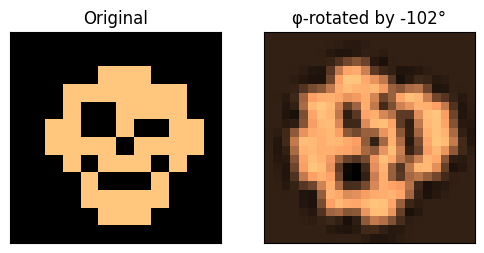

In [1]:
from interpolation import Π, Λ, ϕ, ξ, eddie
from auxiliary import displayImages as DI
from random import randrange as RR, choice
from numpy import array, empty, arange as A, tensordot as tendot
from math import sin, cos, pi
from sys import argv

''' 2D rotation - the canonical version of the NN, bi-linear and bi-qubic-based algorithms
If one wants a serious 2D:
https://scipython.com/book/chapter-8-scipy/additional-examples/interpolation-of-an-image/ '''

clp = lambda n, nmax, nmin = 0: nmin if n < 0 else n if n < nmax else nmax - 1
rclp = lambda n, m, nmax: (clp(n, nmax), clp(m, nmax)) # range clipper

##Turning a 2D image f(n, m) into a 2D function f(x, y) - using 'Π, Λ, ϕ, ξ'

'''A not-so-quick-yet-dirty (loop-in-loop) version...
Since "premature optimization is the root of all evil"!
-- D. Knuth [http://wiki.c2.com/?PrematureOptimization]'''
def fl(img, x, y, ψ = ϕ, Δ = 0b11):
    N, M = img.shape; xx, yy = int(x), int(y)

    fxy = 0.0
    for n in range(*rclp(xx - Δ, xx + Δ, N)):
        for m in range(*rclp(yy - Δ, yy + Δ, M)):
            fxy += ψ(x - n) * ψ(y - m) * img[n, m]
    return fxy
# ... and a quicker'n'cleaner (explicit-loop-free) one
def ft(img, x, y, ψ = ϕ, Δ = 0b11):
    N, M = img.shape; xx, yy = int(x), int(y)
    n, m = A(*rclp(xx - Δ, xx + Δ, N)), A(*rclp(yy - Δ, yy + Δ, M))

    fx, fy = ψ(x - n), ψ(y - m)
    fxy = tendot(fx, fy, axes = 0)

    img = img[clp(xx - Δ, N):clp(xx + Δ, N), clp(yy - Δ, M):clp(yy + Δ, M)]
    return tendot(fxy, img)

## Setting...
#  A rotation angle α...
ϱ = RR(-180, 180) #°
α, Cu = ϱ * pi/180.0, 'copper' # Main and auxiliary variables

#  A source image...
img = eddie; M = len(img); N = eval(argv[0b10]) if len(argv) > 0b10 else M << 0b1
out = empty((N, N))
# ... and rotation of ϑ = [x, y].T, w.r.t. OXY and through that angle
OXY, Rα = array([M/2, M/2]), array([[cos(α), -sin(α)],
                                    [sin(α),  cos(α)]]) # turns clockwise when α > 0

# ... and an interpoland...:) Π, Λ, ϕ, ξ, "or else..."
nomina = argv[0b11] if len(argv) > 0b11 else ϕ.__name__; ψ = eval(nomina)
ToF = lambda: choice([True, False])

f = fl if ToF() else ft
if ToF():
    # Omloop Het...
    for n in range(N):
        for m in range(N):
            ϑ = array([n/N, m/N]) * M - OXY
            x, y = Rα @ ϑ + OXY
            out[n, m] = f(img, x, y, ψ) # cf. rotationNN.py's '... = img[x, y]'
else:
    # A harder-coded version (but a tad faster, right?)
    out = [[f(img, *(OXY + Rα @ (array([n/N, m/N]) * M - OXY)), ψ)
                                                 for m in range(N)]
                                                 for n in range(N)]

DI((img, out), ('Original', f'{nomina}-rotated by {ϱ}°'), cmp = Cu)

# Random users' fun: 

``python .\rotation2D.py '-RR(44)' '42 + RR(7) - 6' 'lambda x: ϕ(x + RR(9)/12)'``

44:   "A imię jego..." A. M. Dz. III
42:   The Deep Thought's answer ( = 7 * 6)
9/12: A quote of Heidegger/Wittgenstein

A note to random fans: f ≠ fl!
And an ι-note for Greek geeks: φ ≡ ϕ! '''
